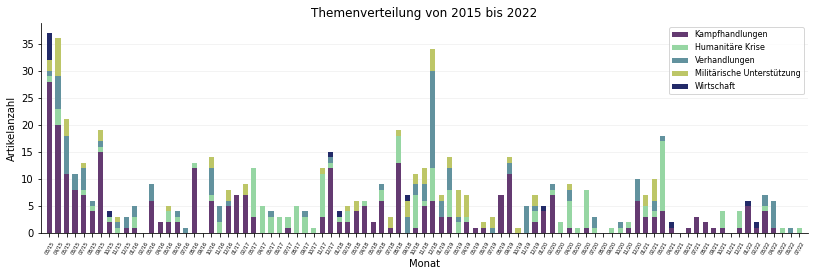

In [5]:
import json 
import matplotlib.pyplot as plt
import numpy as np


with open("overview.json", "r") as f:
    data = json.load(f)

weight_counts = {}
for i, topic in enumerate(['Kampfhandlungen', 'Humanitäre Krise', 'Verhandlungen','Militärische Unterstützung', 'Wirtschaft']):
    weight_counts[topic] = np.array([v[i] for _, v in  data.items()])



days = list(data.keys())
width = 0.6


fig, ax = plt.subplots()

bottom = np.zeros(len(days))

# pastell und blau
# colors = ["#F2BAC9", "#222A68", "#79B791"]
# mit 
# colors = ["#F2BAC9", "#222A68", "#62929E"]
# colors = ["#BDC667", "#222A68", "#62929E"]
#

colors = ["#643A71", "#96D6A3", "#62929E","#BDC667", "#222A68"]



for i, pack in enumerate(weight_counts.items()):
    boolean=pack[0]
    weight_count=pack[1]
    p = ax.bar(days, weight_count, width, label=boolean, bottom=bottom, color=colors[i])
    bottom += weight_count


ax.set_title('Themenverteilung von 2015 bis 2022')

ax.legend(loc="upper right")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

def get_hundret_percent(i):
    result = 0
    for _, vals in weight_counts.items():
        result += vals[i]
    return result 

def get_position(weight_counts, i, reason):
    result = 0
    for r, vals in weight_counts.items():
        if r == reason:
            break
        else:
            result += vals[i]
    result += weight_counts[reason][i]/2
    return result
        


# for i, day in enumerate(days):
#     hundret = get_hundret_percent(i)
#     num = sum([x[i] for x in weight_counts.values()])
#     plt.text(i , num + 0.5 , "$n$ = " + str(num) , 
#                             va = 'center', ha = 'center', rotation = 0, fontsize = 10
#                             )

#     for reason in weight_counts.keys():
#         percentage = weight_counts[reason][i]/hundret * 100
#         perc_string = str(np.round(percentage, 1))+ '%'
#         pos = get_position(weight_counts, i, reason)
#         if perc_string != "0.0%":
#             if reason != "Hunger" and reason != "Spenden":
#                 plt.text(i , pos , perc_string , 
#                             va = 'center', ha = 'center', rotation = 0, fontsize = 10
#                             )
#             else:
#                 plt.text(i , pos , perc_string , 
#                             va = 'center', ha = 'center', rotation = 0, fontsize = 10, color="white"
#                             )
                

cm = 1/2.54  # centimeters in inches

fig.set_figheight(10 * cm)

fig.set_figwidth(29 * cm )
plt.xticks(rotation = 60, fontsize=5) # Rotates X-Axis Ticks by 45-degrees

plt.xlabel("Monat")
plt.ylabel("Artikelanzahl")
plt.xlim([-1, 89])


ax.set_axisbelow(True)
plt.legend(prop={'size': 8})

plt.grid(axis="y", which="major", linestyle="-", color='#f0f0f0')
plt.tight_layout()
plt.savefig('overview.pdf', dpi=200, bbox_inches='tight')

